# Regresja logistyczna

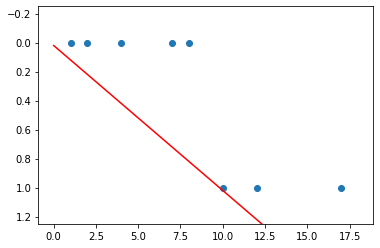

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def transformation(x):
    #return 0.1*x + 0.02
    a = 0.1
    b = 0.02
    return a*x + b
    
    
X = [1,2,4,7,8,10,12,17] #rozmiary guzów
Y = [0,0,0,0,0,1,1,1] #flaga (decyzja) oceniająca ich złośliwość - 1=złośliwy / 0=niezłośliwy
function_sampling_x_coordinates = np.linspace(0,18,500) #generowanie 500 punktów pomiędzy granicami osi X (0,18) 
function_sampling_y_coordinates = [transformation(x) for x in function_sampling_x_coordinates] #wyznaczanie wartosci funkcji transformation w tych punktach 

plt.plot(X, Y, "o")
plt.plot(function_sampling_x_coordinates, function_sampling_y_coordinates, 'r-')
plt.ylim(bottom = 1.25, top = -0.25)

plt.show()

## Zadanie 1
Zamień postać funkcji `transformation` tak, aby stworzyła krzywą logistyczną za pomocą funkcji sigmoidalnej:
$$\frac{1}{1+e^{-(ax+b)}}$$

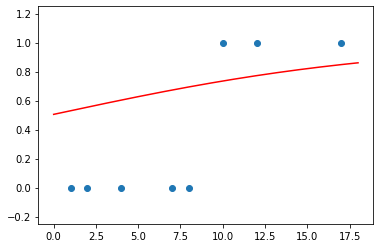

In [2]:
def transformation(x):
    #return 0.1*x + 0.02
    a = 0.1
    b = 0.02
    return 1/(1+np.exp(-(a*x+b)))
    
    
X = [1,2,4,7,8,10,12,17] #rozmiary guzów
Y = [0,0,0,0,0,1,1,1] #flaga (decyzja) oceniająca ich złośliwość - 1=złośliwy / 0=niezłośliwy
function_sampling_x_coordinates = np.linspace(0,18,500) #generowanie 500 punktów pomiędzy granicami osi X (0,18) 
function_sampling_y_coordinates = [transformation(x) for x in function_sampling_x_coordinates] #wyznaczanie wartosci funkcji transformation w tych punktach 

plt.plot(X, Y, "o")
plt.plot(function_sampling_x_coordinates, function_sampling_y_coordinates, 'r-')
plt.ylim(top = 1.25, bottom = -0.25)

plt.show()

Jaki wpływ ma zmiana wartości parametru a na funkcję?

**Im większe a tym szybciej przyrasta wartość funkcji**

Jaki wpływ ma zmiana wartości parametru b na funkcję?

**Zmiana b przesuwa wykres w osi X**

## Zadanie 2
Na podstawie dokumentacji sklearn, stwórz klasyfikator `LogisticRegression` i wytrenuj go odpowiednio, aby dobrze separował przestrzeń.

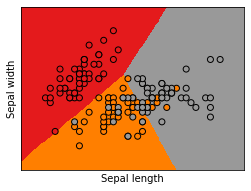

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from helpers_lab2 import plot_boundary

iris = datasets.load_iris()
X = iris.data[:, :2]  #weź tylko dwie cechy przykładowego zbioru
Y = iris.target # Y to klasy, które chcemy przewidzieć

logreg = linear_model.LogisticRegression().fit(X,Y)

plot_boundary(logreg, X, Y)


# Sieci neuronowe

## Zadanie 3:
Odwiedź stronę [playground.tensorflow.org](http://playground.tensorflow.org)

Zredukuj sieć neuronową do minimalnej postaci (0 hidden layers; nie zmieniaj kolumny features) i rozpocznij proces uczenia na problemie nr 3 (dwa rozdzielne skupiska- ang.Gaussian) - czy taka sieć (pojedynczy neuron) nauczyła się odpowiedniej granicy decyzyjnej? (spójrz na wizualizację oraz wykres training/test loss)

**Tak, pojedynczy neuron nauczył się granicy decyzyjnej**
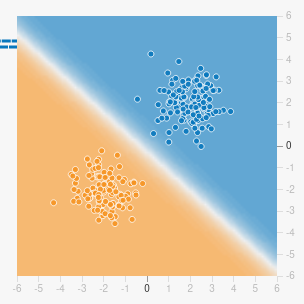

Czy dodanie warstw ukrytych coś zmienia w kontekście wyuczenia? a w kontekście czasu wyznaczania granicy decyzyjnej?

**Manipulacja ilością ukrytych warstw i neuronów na nich powoduje różnice w wyznaczonych granicach - linia może nie być całkowicie prosta, może być pochylona pod różnymi kątami. Im więcej warstw tym proces uczenia jest wolniejszy.**

Zmień zbiór danych na pierwszy (niebieska chmura wewnątrz pomarańczowej obręczy); czy tutaj minimalna sieć uczy się odpowiednio? Odpowiedź uzasadnij.

**Nie jest możliwe rozdzielenie takiego zbioru za pomocą prostej, więc minimalna sieć nie uczy się odpowiednio.**

Jak sprawić, aby sieć zaczęła dobrze działać na zbiorze nr 1? Rozważ niezbędne modyfikacje (preferuj najprostsze sposoby) zarówno w kolumnie features, jak i manipulacje warstwami ukrytymi (hidden layers).

**Dodanie jednej warstwy ukrytej z trzema neuronami daje zadowalające efekty**
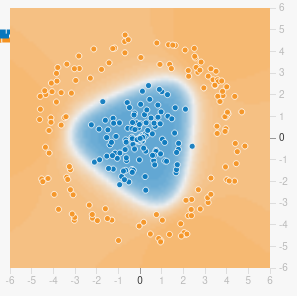

**Podobny efekt można również uzyskać dodając feature X12 i X22**
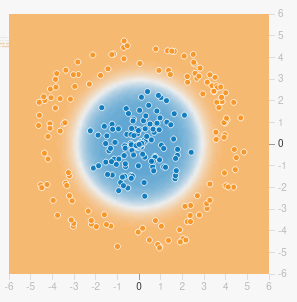

## Zadanie 4

Na podstawie dokumentacji sklearn, stwórz `MLPClassifier`, wytrenuj go a następnie użyj wytrenowanego modelu do przewidywania etykiet na zbiorze testowym.
Utwórz klasyfikator w zmiennej `mlp`, a listę przewidzianych etykiet umieść w obiekcie `predicted`. Doprowadź do sytuacji, w której masz nie więcej niż 8 błędów na zbiorze testowym.

[[34  0  1  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  1  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 42  0  1]
 [ 0  0  0  0  1  1  0  0 34  0]
 [ 0  0  0  0  0  0  0  0  0 35]]

errors: 7


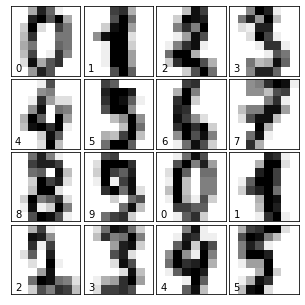

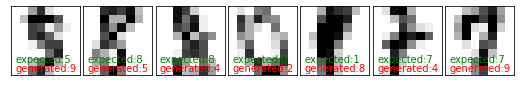

In [4]:
import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

%matplotlib inline
digits = load_digits() #zbiór zawiera 1797 obrazków reprezentujących cyfry od 0 do 9 (czyli 10 klas decyzyjnych)

fig = plt.figure(figsize = (4,4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(16):
    #wyświetl próbkę 16 obrazków wraz z ich prawdziwymi etykietami
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))
    
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=16)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=10000, alpha=0.025, 
                    learning_rate_init=0.001, tol=0.0001, activation="relu", random_state=0).fit(X_train, y_train)  # Inicjowanie i konfiguracja modelu
# ...  # Proces uczenia
predicted = mlp.predict(X_test)   # Rezultaty klasyfikacji dla danych testujących

if predicted is not None:
    # Wizualizacja macierzy pomyłek - pokazuje jakie etykiety pomylono z jakimi innymi
    cm = confusion_matrix(y_test,predicted)
    print(cm)

    expected = y_test 
    fig = plt.figure(figsize=(8, 8))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # Wizualizacja błędnie zaanotowanych obrazków
    cnt = 0
    for i in range(len(X_test)):
        if predicted[i] == expected[i]:
            continue
        ax = fig.add_subplot(8, 8, cnt + 1, xticks=[], yticks=[])
        ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
        cnt += 1

        ax.text(0, 7, "generated:" + str(predicted[i]), color='red')
        ax.text(0, 6, "expected:" + str(expected[i]), color='green')
    print('\nerrors:',cnt)